Calcul de la solution...
Traçage...


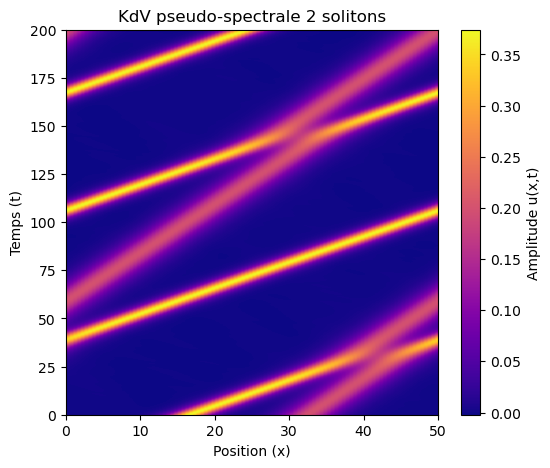

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint #module de résolution d'EDO's
from scipy.fftpack import diff    #module transformée de fourier


#KdV dans le domaine spatial uniquement que l'on implémente dans kdv(u,t,L) ci-dessous
def kdv_exact(x, c):  
    u = 0.5*c/np.cosh(0.5*np.sqrt(c)*x)**2 # mu = 1
    return u

def kdv(u, t, L):     
    # Calcul des dérivées spatiales de KdV méthode pseudo-spectral
    ux = diff(u, period=L)           #dérivée simple
    uxxx = diff(u, period=L, order=3) #dérivée troisième

    # Calcul de du/dt.    
    dudt = -6*u*ux - uxxx   #eta = 6

    return dudt

# Resolution de l'équa diff KdV
def kdv_solution_num(u0, t, L):
    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol


# maillage espace/temps discret
L = 50
M = 100
dx = L / M
x = np.linspace(0, L, M)

T = 200
t = np.linspace(0, T, 501)

# Condition initiale
u0 = kdv_exact(x-0.33*L, 0.75) + kdv_exact(x-0.65*L, 0.4)


print("Calcul de la solution...")
sol = kdv_solution_num(u0, t, L)


print("Traçage...")



plt.figure(figsize=(6,5))
plt.imshow(sol[::-1, :], extent=[0,L,0,T], cmap='plasma')
plt.colorbar(label="Amplitude u(x,t)")
plt.xlabel('Position (x)')
plt.ylabel('Temps (t)')
plt.axis("auto")
plt.title('KdV pseudo-spectrale 2 solitons')
plt.show()